Unique Classes in Target Variable: ['PPE' '0.284654' '0.368674' '0.332634' '0.368975' '0.410335' '0.357775'
 '0.211756' '0.163755' '0.231571' '0.271362' '0.249740' '0.275931'
 '0.138512' '0.199889' '0.170100' '0.234589' '0.218164' '0.430788'
 '0.377429' '0.322111' '0.365391' '0.259765' '0.285695' '0.253556'
 '0.215961' '0.219514' '0.147403' '0.162999' '0.108514' '0.135242'
 '0.085569' '0.068501' '0.096320' '0.056141' '0.044539' '0.057610'
 '0.165827' '0.173218' '0.141929' '0.160691' '0.130554' '0.115730'
 '0.095032' '0.117399' '0.091470' '0.102706' '0.097336' '0.086398'
 '0.133867' '0.128872' '0.103561' '0.105993' '0.119308' '0.147491'
 '0.316700' '0.344834' '0.335041' '0.314464' '0.326197' '0.316395'
 '0.101516' '0.098555' '0.103224' '0.093534' '0.073581' '0.091546'
 '0.226156' '0.226247' '0.185580' '0.141958' '0.180828' '0.242981'
 '0.188180' '0.225461' '0.244512' '0.228624' '0.193918' '0.232744'
 '0.260015' '0.277948' '0.327978' '0.260633' '0.264666' '0.177275'
 '0.242119' '0.200423

C:\Users\shivateja beecharaju\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shivateja beecharaju\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shivateja beecharaju\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shivateja

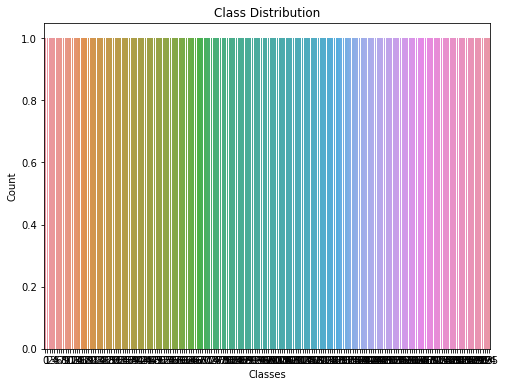

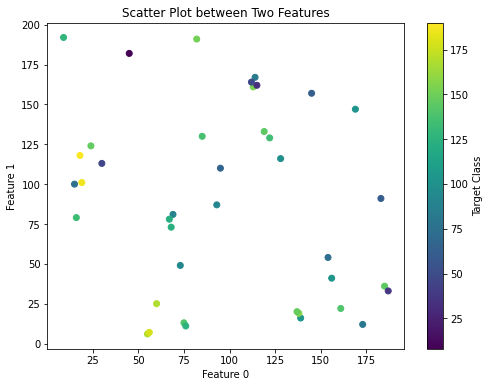

In [23]:
# Question 2 Epilepsy data
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
url = "https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/epilepsy.data"
data = pd.read_csv(url, header=None)
data.head()
X = data.drop(data.columns[-1], axis=1)  
y = data[data.columns[-1]]  
unique_classes = y.unique()
print("Unique Classes in Target Variable:", unique_classes)
class_distribution = y.value_counts()
print("Class Distribution:")
print(class_distribution)
label_encoders = []
for col in X.columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders.append(le)
label_encoder_y = LabelEncoder()
y = label_encoder_y.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, rf_predictions)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, rf_predictions))
plt.figure(figsize=(8, 6))
sns.countplot(x=y)
plt.xlabel('Classes')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()
feature_0 = 0  
feature_1 = 1  
plt.figure(figsize=(8, 6))
plt.scatter(X_test.iloc[:, feature_0], X_test.iloc[:, feature_1], c=y_test, cmap='viridis')
plt.xlabel(f'Feature {feature_0}')
plt.ylabel(f'Feature {feature_1}')
plt.title('Scatter Plot between Two Features')
plt.colorbar(label='Target Class')
plt.show()

Mean Squared Error (Linear Regression): 24464469885976.84
R-squared (Linear Regression): -0.9997216040794747


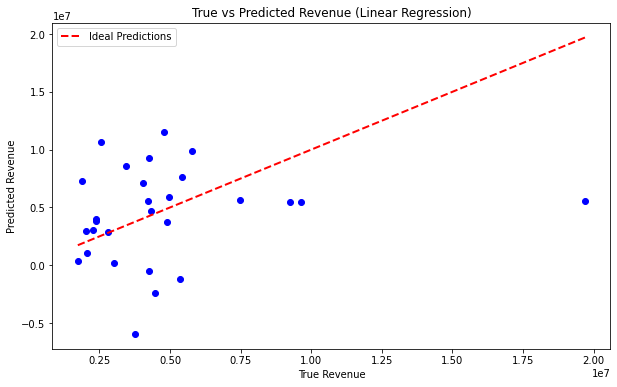

In [46]:
#3. Question
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
url = "https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/Shopping_Revenue.csv"
data = pd.read_csv(url)
data['Open Date'] = pd.to_datetime(data['Open Date'])
data['Year'] = data['Open Date'].dt.year
data['Month'] = data['Open Date'].dt.month
data['Day'] = data['Open Date'].dt.day
data_cleaned = data.drop(columns=['Open Date'])
data_encoded = pd.get_dummies(data_cleaned, columns=['City', 'City Group','Type'], drop_first=True)
imputer = SimpleImputer(strategy='mean')  
imputed_data = imputer.fit_transform(data_encoded)
data_imputed = pd.DataFrame(imputed_data, columns=data_encoded.columns)
X = data_imputed.drop(columns=['revenue'])
y = data_imputed['revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_predictions = linear_model.predict(X_test)
mse = mean_squared_error(y_test, linear_predictions)
r2 = r2_score(y_test, linear_predictions)
print("Mean Squared Error (Linear Regression):", mse)
print("R-squared (Linear Regression):", r2)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, linear_predictions, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Ideal Predictions')
plt.xlabel('True Revenue')
plt.ylabel('Predicted Revenue')
plt.title('True vs Predicted Revenue (Linear Regression)')
plt.legend()
plt.show()